## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o sitee do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAJED considerando as suas colunas.

8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

9. Avançado: Plote uma **regressão múltipla**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, expon, bernoulli, binom, randint, poisson, shapiro

In [2]:
df1 = pd.read_csv("CAGEDEST_122018.txt", sep=";",encoding="latin1")

C:\Users\Jonatas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1


In [4]:
df1.dtypes

Admitidos/Desligados      int64
Competência Declarada     int64
Município                 int64
Ano Declarado             int64
CBO 2002 Ocupação         int64
CNAE 1.0 Classe           int64
CNAE 2.0 Classe           int64
CNAE 2.0 Subclas          int64
Faixa Empr Início Jan     int64
Grau Instrução            int64
Qtd Hora Contrat          int64
IBGE Subsetor             int64
Idade                     int64
Ind Aprendiz              int64
Ind Portador Defic        int64
Raça Cor                  int64
Salário Mensal           object
Saldo Mov                 int64
Sexo                      int64
Tempo Emprego            object
Tipo Estab                int64
Tipo Defic                int64
Tipo Mov Desagregado      int64
UF                        int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm DF            int64
Mesorregião               int64
Microrregião              int64
Região A

In [5]:
df2 = pd.read_csv("CAGEDEST_122018.txt", sep=";",decimal=",", thousands=".",usecols=['Salário Mensal','Sexo','Raça Cor', 'Grau Instrução','Idade'], encoding="latin1")

In [6]:
df2.head()

,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo
0,6,24,8,954.0,1
1,8,25,2,2500.0,1
2,2,55,8,0.0,1
3,2,52,8,0.0,1
4,2,32,8,0.0,1


In [7]:
df2.sort_values(by=['Salário Mensal'])

,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo
1039127,6,26,9,0.0,1
622432,7,19,9,0.0,1
622462,7,36,2,0.0,2
622463,7,18,2,0.0,2
1457667,9,42,8,0.0,1
...,...,...,...,...,...
1812873,7,26,2,140000.0,1
1088049,9,56,2,140550.0,1
1283357,9,34,2,141480.0,1
1508854,8,40,6,142726.0,2


In [8]:
df2.dtypes

Grau Instrução      int64
Idade               int64
Raça Cor            int64
Salário Mensal    float64
Sexo                int64
dtype: object

In [ ]:
ax1 = df2['Salário Mensal']
ax2 = df2['']

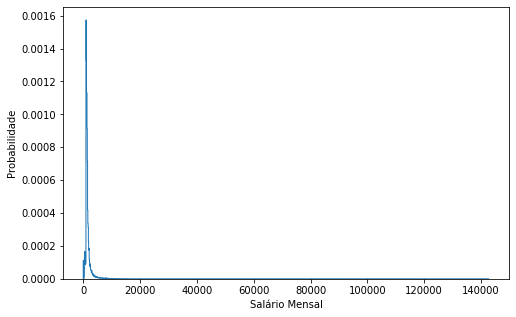

In [9]:
classes = int(np.sqrt(df2.shape[0]))
ax1 = df2['Salário Mensal'].plot.hist(
        bins=classes,
        density=True,
        histtype="step",
        figsize=(8,5),
    )
ax1.set_xlabel("Salário Mensal")
ax1.set_ylabel("Probabilidade");

In [10]:
shapiro(df2['Salário Mensal'])

C:\Users\Jonatas\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.2637892961502075, 0.0)

In [22]:
ax1_amostra_lista = []
for i in range(0,5000):
    ax1_amostra_lista = ax1_amostra_lista + [np.random.choice(df2['Salário Mensal'])]
shapiro(ax1_amostra_lista)

(0.3746541738510132, 0.0)

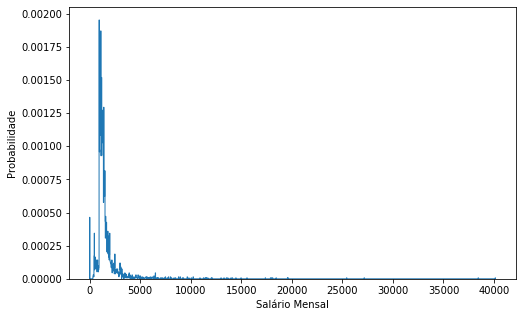

In [24]:
ax1_amostra_serie = pd.Series(ax1_amostra_lista)
classes = int(np.sqrt(df2.shape[0]))
ax1_amostra = ax1_amostra_serie.plot.hist(
        bins=classes,
        density=True,
        histtype="step",
        figsize=(8,5),
    )
ax1_amostra.set_xlabel("Salário Mensal")
ax1_amostra.set_ylabel("Probabilidade");

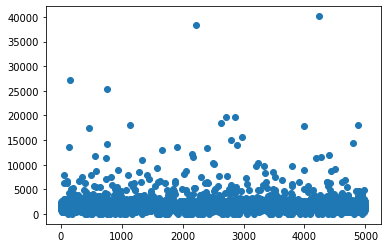

In [31]:
plt.scatter(ax1_amostra_serie.index, ax1_amostra_serie);

In [14]:
df2.corr()['Salário Mensal']

Grau Instrução    0.184702
Idade             0.151294
Raça Cor         -0.077727
Salário Mensal    1.000000
Sexo             -0.042394
Name: Salário Mensal, dtype: float64